In [ ]:
!where python

c:\Users\RBO\repos\mbo_utilities\.venv\Scripts\python.exe
C:\Users\RBO\AppData\Local\Microsoft\WindowsApps\python.exe


# Image Assembly

Converting raw scanimage-tiff files into fused z-planes.

## Quickstart

All you need is a path to your .tiffs and a place to save them.
``` python
import mbo_utilities as mbo
``` python
scan = mbo.imread(r"path/to/tiffs*") # glob or list of filepaths (see mbo.get_files)

# save just mROI 1
scan.roi = 1

# save mROI 1 and 2
scan.roi = [1, 2]

# save all mROIs separately (helpful if you have many mROIs)
scan.roi = 0 

# stitch/fuse mROI's
scan.roi = None

mbo.imwrite(scan, "/path/to/save", planes=[1, 7, 14]) # defaults to saving plane_01.tiff, plane_02.tiff ... 
```

In [3]:
from pathlib import Path
import numpy as np

import fastplotlib as fpl
import mbo_utilities as mbo

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),Intel(R) Graphics (RPL-P),IntegratedGPU,Vulkan,Mesa 24.0.3-1pop1~1711635559~22.04~7a9f319
❗ limited,"llvmpipe (LLVM 15.0.7, 256 bits)",CPU,Vulkan,Mesa 24.0.3-1pop1~1711635559~22.04~7a9f319 (LLVM 15.0.7)
❌,Mesa Intel(R) Graphics (RPL-P),IntegratedGPU,OpenGL,4.6 (Core Profile) Mesa 24.2.8-1~bpo12+1pop1~1744225826~22.04~b077665


## Input data: Path to your raw .tiff file(s)

Make sure your `data_path` contains only `.tiff` files for this imaging session. If there are other `.tiff` files, such as from another session or a processed file for this session, those files will be included in the scan and lead to errors.

## Initialize a scanreader object

Pass a list of files, or a wildcard string (e.g. "/path/to/files/*"matches all files in that directory) to {func}`mbo_utilities.read_scan`.

``` {tip}
mbo.get_files() is useful to easily get all files of the same filetype
```

In [5]:
files = mbo.get_files("/home/flynn/lbm_data/raw", 'tif')
len(files)

15

In [6]:
scan = mbo.imread(files)

Initializing MBO Scan with parameters:
roi: None, fix_phase: True, phasecorr_method: frame, border: 3, upsample: 5, max_offset: 4


Scanning depth 0, ROI 0 
Scanning depth 0, ROI 1 
Raw tiff fully read.
Scanning depth 0, ROI 0 
Scanning depth 0, ROI 1 


In [11]:
print(scan.roi) # None = stitch mROI's

None



This will display a widget allowing you to scroll in time and in z.

numpy like indexing:
``` python
frame = scan[0, 0, :, :] # first frame, plane1
zplane7 = scan[:, 6, :, :] # z-plane 6
zplane7 = scan[:, 6, :, :] # z-plane 6
```

RFBOutputContext()

JupyterRenderCanvas(css_height='1000.0px', css_width='800.0px')
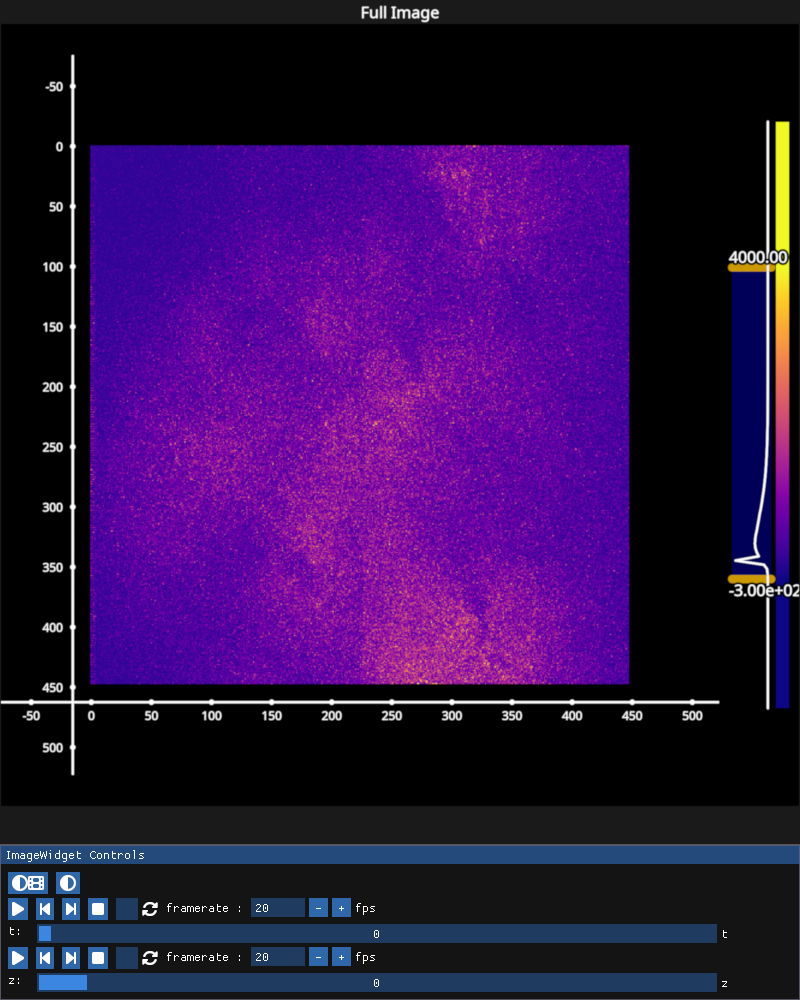

In [15]:
iw = scan.imshow()
iw.show()

In [16]:
iw.close()

## Save assembled files

The currently supported file extensions are `.tiff`.

In [ ]:
save_path = Path("/home/flynn/lbm_data/stitched")
save_path.mkdir(exist_ok=True)

mbo.imwrite(
    scan,
    save_path,
    planes=[1, 7, 14],      # for 14 z-planes, first, middle, last
    overwrite=True,
    ext = '.tiff',
)

Saving plane01_stitched.tiff:   0%|          | 0/30 [00:00<?, ?it/s]

Saving plane07_stitched.tiff:   0%|          | 0/30 [00:00<?, ?it/s]

Saving plane14_stitched.tiff:   0%|          | 0/30 [00:00<?, ?it/s]

## Vizualize data with [fastplotlib](https://www.fastplotlib.org/user_guide/guide.html#what-is-fastplotlib)

To get a rough idea of the quality of your extracted timeseries, we can create a fastplotlib visualization to preview traces of individual pixels.

Here, we simply click on any pixel in the movie, and we get a 2D trace (or "temporal component" as used in this field) of the pixel through the course of the movie:

```{figure} ../_images/raw_data_preview.png
:align: center
```

More advanced visualizations can be easily created, i.e. adding a baseline subtracted element to the trace, or passing the trace through a frequency filter.

In [19]:
import tifffile
from ipywidgets import VBox

img = tifffile.memmap("/home/flynn/lbm_data/stitched/plane07_stitched.tif")
iw_movie = fpl.ImageWidget(img, cmap="viridis")

tfig = fpl.Figure()

raw_trace = tfig[0, 0].add_line(np.zeros(img.shape[0]))

@iw_movie.managed_graphics[0].add_event_handler("click")
def pixel_clicked(ev):
    col, row = ev.pick_info["index"]
    raw_trace.data[:, 1] =  iw_movie.data[0][:, row, col]
    tfig[0, 0].auto_scale(maintain_aspect=False)

VBox([iw_movie.show(), tfig.show()])

RFBOutputContext()

RFBOutputContext()